## Activations (e)

In [19]:
from neuralnet import *
from random import shuffle
import numpy as np

# Load the configuration.
config = load_config("./data")


In [20]:
# Load model parameters
# TODO: GET BEST PARAMS FROM (d) Regularization
config = {}
config['layer_specs'] = [3072, 64, 64, 10]
config['learning_rate'] = 0.01
config['batch_size'] = 256 
config['epochs'] = 10
config['early_stop'] = True 
config['early_stop_epoch'] = 5  
config['L2_penalty'] = 0  
config['momentum'] = True  
config['momentum_gamma'] = 0.9  

# Test different activations (not including tanh)
activations = ['ReLU', 'leakyReLU', 'sigmoid']


In [21]:
# Load the data
X_train, y_train, X_stats = load_data(path="./data", stats=None, mode="train")
X_test, y_test = load_data(path="./data", stats=X_stats, mode="test")
X_train, y_train, X_valid, y_valid = split_data(X_train,y_train)


(50000, 32, 32, 3)
inp: (50000, 32, 32, 3)


In [22]:
# Fake train for test data
inc = 0
def train(model,X_train,y_train,X_valid,y_valid,config):
    global inc
    num_epochs = config['epochs']
    train_loss = [i + inc for i in range(num_epochs)]
    valid_loss = [i + 1 + inc for i in range(num_epochs)]
    train_acc = [i + 2 + inc for i in range(num_epochs)]
    valid_acc = [i + 3 + inc for i in range(num_epochs)]
    inc += 2
    return train_loss, train_acc, valid_loss, valid_acc



In [23]:
all_train_loss_record = []
all_train_acc_record = []

all_valid_loss_record = []
all_valid_acc_record = []

all_test_acc_record = []

for activation in activations:
    config['activation'] = activation
    model = Neuralnetwork(config)
    train_loss_record, train_accuracy_record, valid_loss_record, valid_accuracy_record = train(model,X_train,y_train,X_valid,y_valid,config)
    all_train_loss_record.append(train_loss_record)
    all_train_acc_record.append(train_accuracy_record)
    all_valid_loss_record.append(valid_loss_record)
    all_valid_acc_record.append(valid_accuracy_record)

    # Recall parameters with minimum validation loss
    model.save_load_weight(save=False) # load best weights
    test_accuracy = test(model, X_test, y_test) 
    all_test_acc_record.append(test_accuracy)

In [24]:
import matplotlib.pyplot as plt
num_epochs = [i for i in range(config['epochs'])]


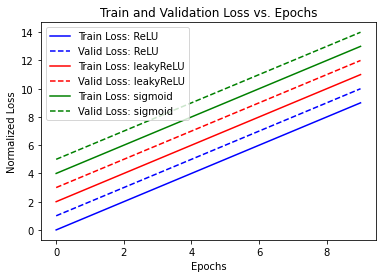

In [25]:
## Plot train and valid loss on one graph

# Line type
train_loss_lt = ['-b', '-r', '-g']
valid_loss_lt = ['--b', '--r', '--g']

for i, activation in enumerate(activations):
    plt.plot(num_epochs, all_train_loss_record[i], train_loss_lt[i], label=f"Train Loss: {activation}")
    plt.plot(num_epochs, all_valid_loss_record[i], valid_loss_lt[i], label=f"Valid Loss: {activation}")
plt.xlabel('Epochs')
plt.ylabel('Normalized Loss')
plt.title("Train and Validation Loss vs. Epochs")
plt.legend()
plt.savefig('plots/(e)_act_loss.png')
plt.show()

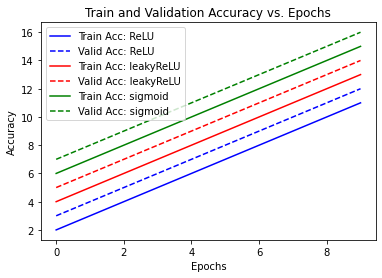

In [26]:
## Plot Train and valid acc on another

# Line type
train_acc_lt = ['-b', '-r', '-g']
valid_acc_lt = ['--b', '--r', '--g']

for i, activation in enumerate(activations):
    plt.plot(num_epochs, all_train_acc_record[i], train_acc_lt[i], label=f"Train Acc: {activation}")
    plt.plot(num_epochs, all_valid_acc_record[i], valid_acc_lt[i], label=f"Valid Acc: {activation}")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Train and Validation Accuracy vs. Epochs")
plt.legend()
plt.savefig('plots/(e)_act_acc.png')
plt.show()

In [27]:
# Report final test accuracy
for i, activation in enumerate(activations):
    print(f"Final Test Accuracy for {activation}: {all_test_acc_record[i]:.4f}")


Final Test Accuracy for ReLU: 0.1000
Final Test Accuracy for leakyReLU: 0.1000
Final Test Accuracy for sigmoid: 0.1000
